# Implementation of the HOG algorithm from scratch:
We first get the feel of the working of the algorithm by coding it from scratch. After that, we look into how things can be simplified using OpenCV

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

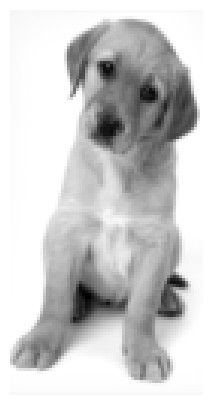

In [ ]:
img = color.rgb2gray(io.imread('dog.jpeg'))
resized_img = resize(img, (128, 64))
plt.figure(figsize=(10, 5))
plt.imshow(resized_img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
mag_array = []
theta_array = []
for i in range(128):
  magnitude_array = []
  angle_array = []

  for j in range(64):
    if j-1<=0 or j+1>=64:

      if j-1<=0:
        Gx = resized_img[i][j+1] - 0
      else:
        Gx = 0 - resized_img[i][j-1]

    else:
      Gx = resized_img[i][j+1]-resized_img[i][j-1]

    if i-1<=0 or i+1>=128:

      if i-1<=0:
        Gy = 0 - resized_img[i+1][j]
      else:
        Gy = resized_img[i-1][j] - 0

    else:
      Gy = resized_img[i-1][j]-resized_img[i+1][j]

    magnitude = math.sqrt(pow(Gx, 2) + pow(Gy, 2))
    magnitude_array.append(round(magnitude, 9))

    if Gx == 0:
      angle = math.degrees(0.0)
    else:
      angle = math.degrees(abs(math.atan(Gy/Gx)))

    angle_array.append(round(angle, 9))

  mag_array.append(magnitude_array)
  theta_array.append(angle_array)


In [ ]:
mag = np.array(mag_array)
angle = np.array(theta_array)

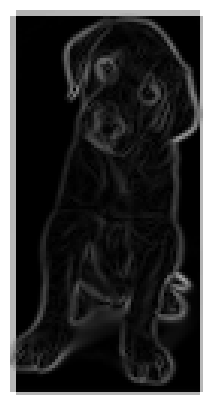

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(mag, cmap='gray')
plt.axis('off')
plt.show()

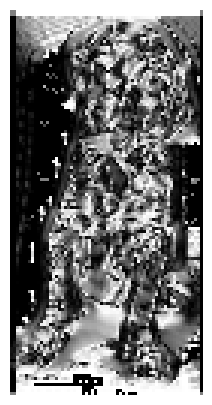

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(angle, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
number_of_bins = 9
step_size = 180/number_of_bins

In [ ]:
def calculate_j(angle):
  temp = (angle/step_size) - 0.5
  j = math.floor(temp)
  return j

In [ ]:
def calculate_Cj(j):
  Cj = step_size*(j+0.5)
  return round(Cj, 9)

In [ ]:
def calculate_Vj(magnitude, angle, j):
  Cj = calculate_Cj(j+1)
  Vj = magnitude*((Cj-angle)/step_size)
  return round(Vj, 9)

In [ ]:
nine_point_histogram = []
for i in range(0, 128, 8):
  temp = []
  for j in range(0, 64, 8):
    magnitude_values = [[mag[i][x] for x in range(j, j+8)] for y in range(i, i+8)]
    angle_values = [[angle[i][x] for x in range(j, j+8)] for y in range(i, i+8)]
    for k in range(len(magnitude_values)):
      for l in range(len(magnitude_values[0])):
        bins = [0.0 for _ in range(number_of_bins)]
        value_j = calculate_j(angle_values[k][l])
        Vj = calculate_Vj(magnitude_values[k][l], angle_values[k][l], value_j)
        Vj_1 = magnitude_values[k][l] - Vj
        bins[value_j]+=Vj
        bins[value_j+1]+=Vj_1
        bins = [round(x, 9) for x in bins]
    temp.append(bins)
  nine_point_histogram.append(temp)

In [ ]:
print(len(nine_point_histogram))
print(len(nine_point_histogram[0]))
print(len(nine_point_histogram[0][0]))

16
8
9


In [ ]:
epsilon = 1e-05

In [ ]:
feature_vectors = []
for i in range(0, len(nine_point_histogram) - 1, 1):
  temp = []
  for j in range(0, len(nine_point_histogram[0]) - 1, 1):
    values = [[nine_point_histogram[i][x] for x in range(j, j+2)] for i in range(i, i+2)]
    final_vector = []
    for k in values:
      for l in k:
        for m in l:
          final_vector.append(m)
    k = round(math.sqrt(sum([pow(x, 2) for x in final_vector])), 9)
    final_vector = [round(x/(k + epsilon), 9) for x in final_vector]
    temp.append(final_vector)
  feature_vectors.append(temp)

In [ ]:
print(len(feature_vectors))
print(len(feature_vectors[0]))
print(len(feature_vectors[0][0]))

15
7
36


In [ ]:
print(f'Number of HOG features = {len(feature_vectors) * len(feature_vectors[0]) * len(feature_vectors[0][0])}')

Number of HOG features = 3780


# Implementation using OpenCV library:
OpenCV has a built-in function 'hog', which can be used directly without coding the entire algorithm from scratch, making things extremely simple for us!

In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

(670, 391, 3)


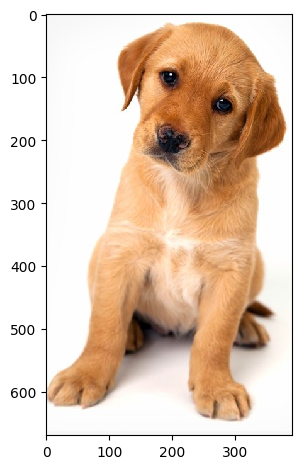

In [ ]:
img = imread('dog.jpeg')
imshow(img)
print(img.shape)


(128, 64, 3)


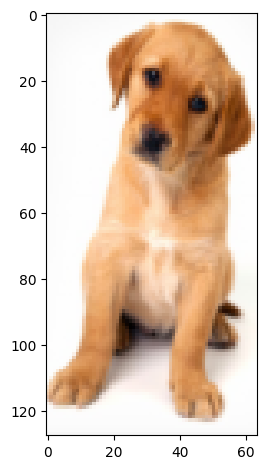

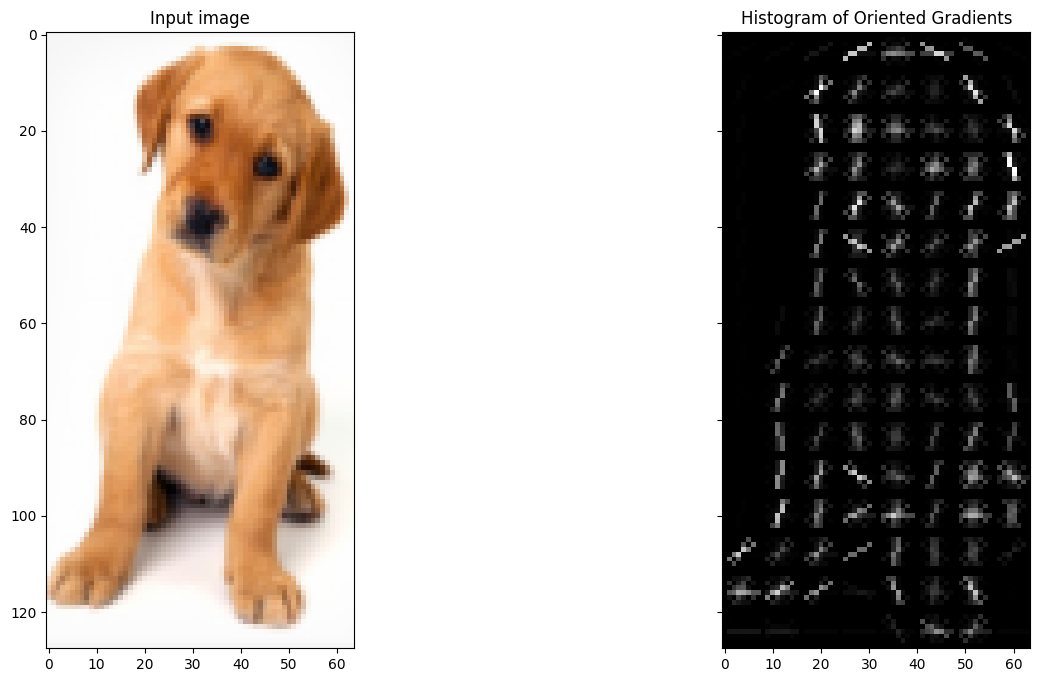

In [ ]:
resized_img = resize(img, (128, 64))
imshow(resized_img)
print(resized_img.shape)

fd, hog_img = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=-1)
fd.shape

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

ax2.imshow(hog_img_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.savefig("output.png")

plt.show()